In [1]:
import cv2
import numpy as np
from pyzbar.pyzbar import decode

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import skimage.io as io
from pylab import *
import skimage
from skimage.restoration import denoise_bilateral
from skimage import data, filters, exposure, feature, measure
from skimage import img_as_float
from skimage.morphology import disk, reconstruction
import scipy
from matplotlib import pylab as plt  
import numpy as np

import warnings
warnings.simplefilter("ignore")
plt.rcParams["figure.figsize"] = (30,20)

In [89]:
img_names = ["05102009104.jpg", "05102009155.jpg", \
             "05102009202.jpg", "PfggfhgICT0034.jpg", \
             "PICT00hfghg10.jpg",  "PIghCT0005.jpg", \
             "PICT00ghhgh26.jpg", "sample1.jpg"]

img_dirs = []
for name in img_names:
    img_dirs.append("img/barcodes/" + name)

print(img_dirs)

['img/barcodes/05102009104.jpg', 'img/barcodes/05102009155.jpg', 'img/barcodes/05102009202.jpg', 'img/barcodes/PfggfhgICT0034.jpg', 'img/barcodes/PICT00hfghg10.jpg', 'img/barcodes/PIghCT0005.jpg', 'img/barcodes/PICT00ghhgh26.jpg', 'img/barcodes/sample1.jpg']


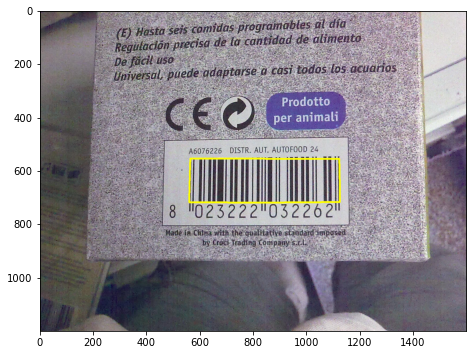

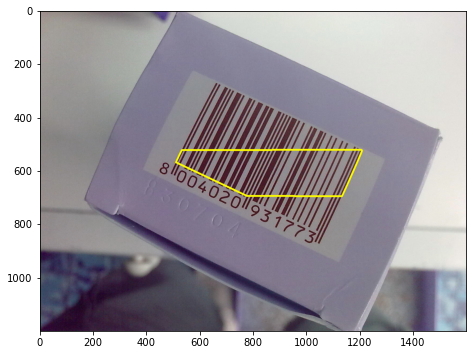

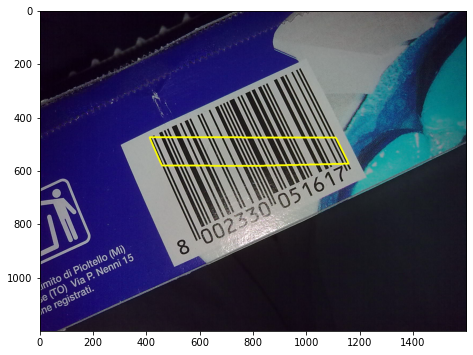

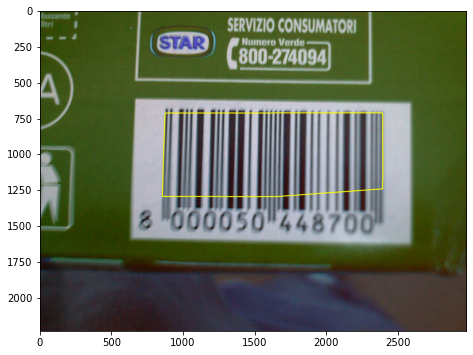

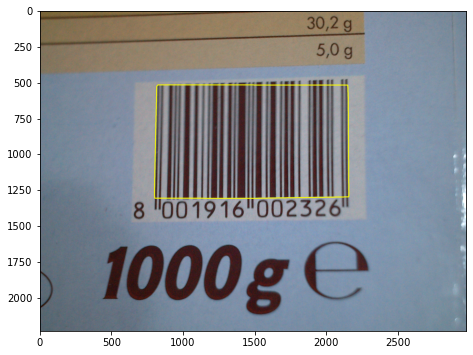

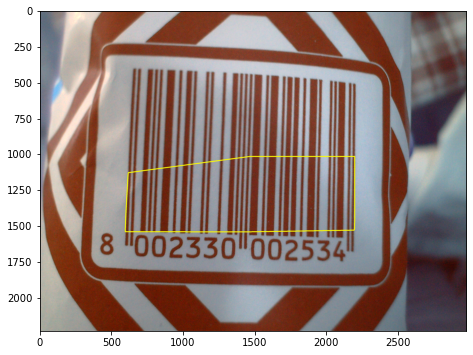

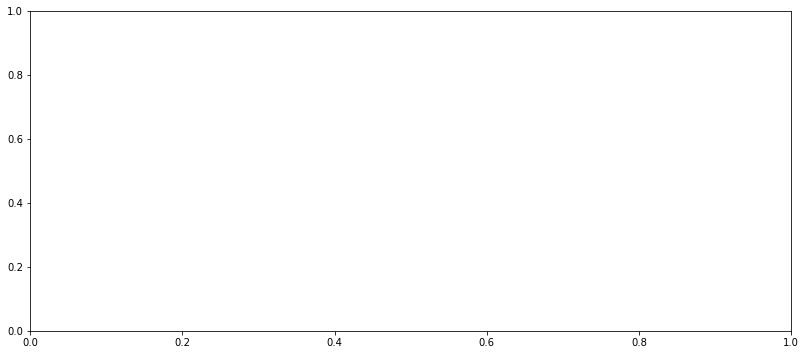

In [90]:
for img_dir in img_dirs:
    
    img = cv2.imread(img_dir)
    ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    subplot(3,2,i+1)
    for barcode in decode(bw_img):
        #print(barcode.data)
        mydata = barcode.data.decode('utf-8')
        #print(mydata)
        pts = np.array([barcode.polygon], np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img, [pts], True, (255,255,0), 5)
        
        plt.imshow(img)
        plt.show()

Our implementation - morphological transformations

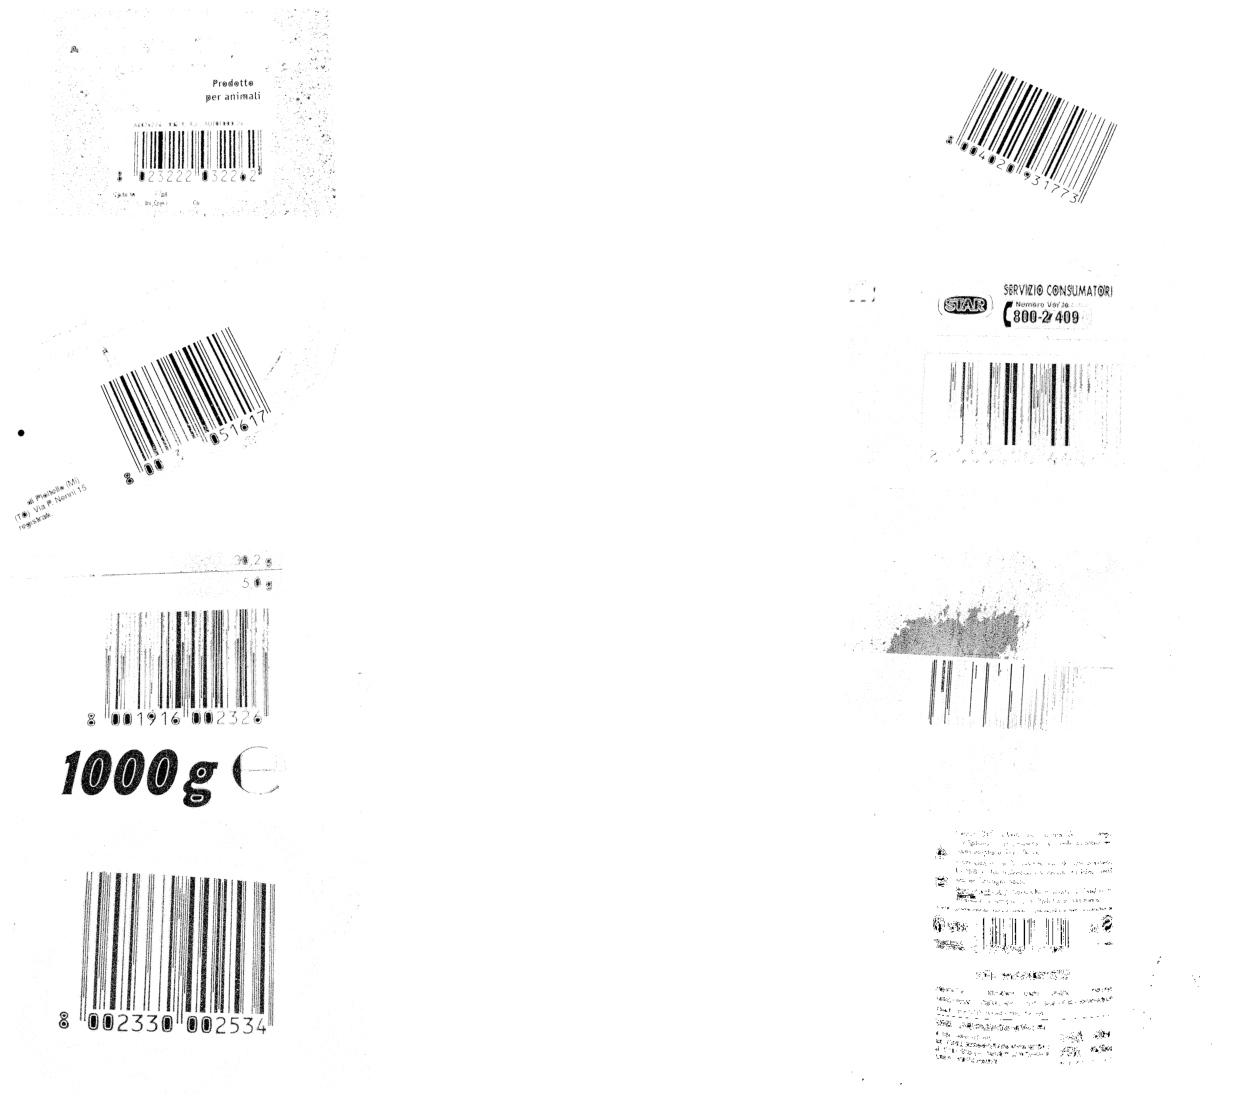

In [103]:
for i, img_dir in enumerate(img_dirs):
    img = img_as_float(io.imread(img_dir, as_gray=True))
    subplot(4,2,i+1)
    
    sobel_v = abs(filters.sobel_v(img))**0.5
    sobel_h = abs(filters.sobel_h(img))**0.5
    img = sobel_v + sobel_h
    
    # keep commented
#     threshold = filters.threshold_niblack(img)
#     threshold = filters.threshold_otsu(img)
#     threshold = filters.threshold_yen(img)
    # keep commented
#     img = scipy.ndimage.gaussian_filter(img, sigma=6)

    thresholds = [filters.threshold_niblack(img), filters.threshold_otsu(img), filters.threshold_yen(img)]
    threshold = sum(thresholds)/len(thresholds)
    img = img > threshold
    
    seed = np.copy(img)
    seed[1:-1, 1:-1] = img.min()
    background = reconstruction(seed, img, method='dilation')
    img = img - background
    
#     seed = np.copy(img)
#     seed[1:-1, 1:-1] = img.max()
#     background = reconstruction(seed, img, method='erosion')
#     img = img - background
    
    show = imshow(img, cmap='gray')
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    show